# Analyze Dashboard Data
If the script doesn't display properly (e.g. curly braces in the markdown) **trust the notebook** in the top right corner and rerender the markdown by running them again.


In [144]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.json',
    multiple=False)
upload

FileUpload(value={}, accept='.json', description='Upload')

Make sure that you click and run the cell below after having chosen the correct .json file

(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.5948    ,
       21.94880009, 27.37779999, 36.08960009, 42.02900004, 55.36100006,
       55.36100006, 55.36100006, 55.36100006]), array([0.81549439, 0.81549439, 0.81549439, 0.81549439, 0.81549439,
       0.81549439, 0.81549439, 0.81549439, 0.81549439, 0.        ,
       0.        , 0.        , 0.        ]), 3)
(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.5948    ,
       21.94880009, 27.37779999, 36.08960009, 42.02900004, 55.36100006,
       55.36100006, 55.36100006, 55.36100006]), array([0.6116208, 0.6116208, 0.6116208, 0.6116208, 0.6116208, 0.6116208,
       0.6116208, 0.6116208, 0.6116208, 0.       , 0.       , 0.       ,
       0.       ]), 3)
(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.5948    ,
       21.94880009, 27.37779999, 36.08960009, 42.02900004, 55.36100006,
       55.36100006, 55.36100006, 55.36100006]), array([46.78899083, 46.7592396 , 46.86957223, 46.65954179, 46.70888621

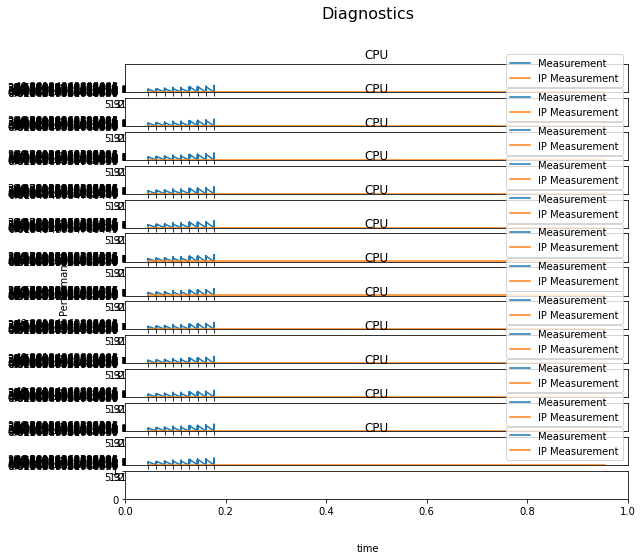

In [175]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


assert upload.data, 'File missing, please upload in above cell'
data = json.loads(upload.data[0].decode('utf-8'))

cpu_processes = np.array([[],[],[]])
t0= data['process_stats'][0]['time']
cpu = (data['resources_stats'][0]['cpu'])
for x in cpu:
    cpu_max = cpu[x]


container_id = data['containers']

for x in container_id:
    if container_id[x] == 'cocky_banach': #should be behaviour_benchmarking
        behaviour_benchmarking_key = x


process_stats = data['process_stats']
container_stats = data['container_stats']


for x in process_stats:
    if x['container'] == behaviour_benchmarking_key:
        dat = np.array([[x['time']-t0,float(x['pcpu'])/cpu_max*100,x['command']]])
        cpu_processes = np.append(cpu_processes,dat.T, axis=1)


length = cpu_processes.shape[1]
occurrences = np.count_nonzero(cpu_processes == cpu_processes[0][2])
time_ip = np.linspace(float(cpu_processes[0][0]), float(cpu_processes[0][-1]), 100) 

bm_ip = np.array([time_ip])
fig, axes= plt.subplots(occurrences, 1, figsize=(9, 8))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

#print(cpu_processes[2])

for i in range(0,occurrences-1):
    cpu_processes_int = cpu_processes[:,i:length-1:occurrences]
    #cpu_processes_int[0] = cpu_processes_int[0].astype(float)
    for j in range(0,len(cpu_processes)-2):
        #cpu_processes_int[j+1] = cpu_processes_int[j+1].astype(float)
        #print((cpu_processes_int[j+1]))
        tck = interpolate.splrep((cpu_processes_int[0]), (cpu_processes_int[j+1]), s=0)
        print(tck)
        ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
        bm_ip = np.append(bm_ip, ip, axis=0)


        axes[i].plot(cpu_processes[0], cpu_processes[j+1], bm_ip[0], bm_ip[j+1])
        axes[i].legend(['Measurement', 'IP Measurement'])
        axes[i].set_title('CPU')
        axes[i].set_ylim(0, 100)
    
    
fig.suptitle('Diagnostics', fontsize=16)
plt.show()



# Info available:
# "container":"b15db65da2d56479c18f6eb6319deb2f78319e2f59c5766e617b79f12fba7138",
# "time":1588330386.5554,
# "ppid":"19871",
# "pid":"21485",
# "pcpu":"45.8",
# "nthreads":"8",
# "cputime":"00:08:19",
# "pmem":"7.3",
# "mem":108.412,
# "command



In [140]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.json',
    multiple=False)
upload

FileUpload(value={}, accept='.json', description='Upload')

<class 'numpy.float64'>
(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.16340017,
       21.47189999, 29.53960013, 37.92320013, 43.50040007, 56.95749998,
       56.95749998, 56.95749998, 56.95749998]), array([72.09535748, 71.95051071, 71.92354901, 72.47235745, 72.0646971 ,
       72.35293489, 72.01268404, 72.24992208, 72.10784817,  0.        ,
        0.        ,  0.        ,  0.        ]), 3)
<class 'numpy.float64'>
(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.16340017,
       21.47189999, 29.53960013, 37.92320013, 43.50040007, 56.95749998,
       56.95749998, 56.95749998, 56.95749998]), array([21.25248194, 21.25248194, 21.25248194, 21.25248194, 21.25248194,
       21.25248194, 21.25248194, 21.25248194, 21.25248194,  0.        ,
        0.        ,  0.        ,  0.        ]), 3)
<class 'numpy.float64'>
(array([ 0.        ,  0.        ,  0.        ,  0.        , 13.16340017,
       21.47189999, 29.53960013, 37.92320013, 43.50040007, 56.95749998,
       

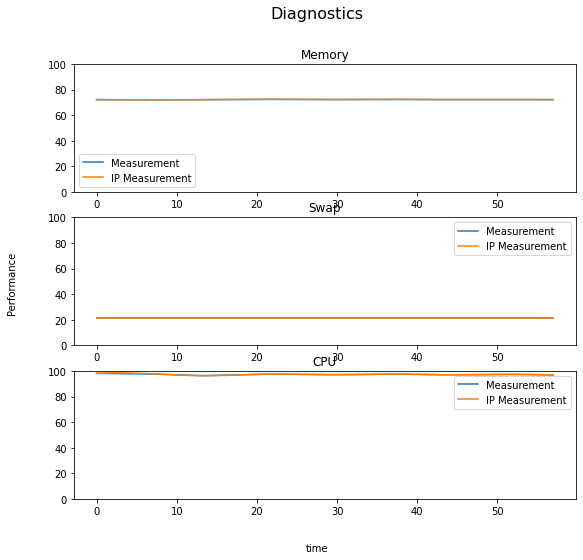

In [154]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# http://json.parser.online.fr/

assert upload.data, 'File missing, please upload in above cell'
data = json.loads(upload.data[0].decode('utf-8'))

meas_name = ['Memory', 'Swap', 'CPU']
bm_data = np.array([[],[],[],[]])
t0= data['resources_stats'][0]['time']

for meas in data['resources_stats']:
    dat = np.array([[meas['time']-t0, meas['memory']['used']/meas['memory']['total']*100, meas['swap']['used']/meas['swap']['total']*100, meas['cpu']['pcpu']]])
    bm_data = np.append(bm_data, dat.T, axis=1)

time_ip = np.linspace(bm_data[0][0], bm_data[0][-1], 100) 
bm_ip = np.array([time_ip])
fig, axes= plt.subplots(3, 1, figsize=(9, 8))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

for i in range(len(bm_data)-1):
    print(type( bm_data[i+1][0]))
    tck = interpolate.splrep(bm_data[0], bm_data[i+1], s=0)
    print(tck)
    ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
    bm_ip = np.append(bm_ip, ip, axis=0)
    
    
    axes[i].plot(bm_data[0], bm_data[i+1], bm_ip[0], bm_ip[i+1])
    axes[i].legend(['Measurement', 'IP Measurement'])
    axes[i].set_title(meas_name[i])
    axes[i].set_ylim(0, 100)
    
    
fig.suptitle('Diagnostics', fontsize=16)
plt.show()

# HW_Check Analyzis

In [7]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


with open(r'../data/BenchmarkXY/CH_ETHZ_Linus_2020-05-05_DB18_hardware-compliance.yaml') as file:
    documents = yaml.full_load(file)

    for item, doc in documents.items():
        print(item, ":", doc)

verdict : True
hostname : autobot01
db_version : DB18
date : 2020-05-05
country : CH
institution : ETHZ
mac-adress : b8:27:eb:e2:65:35
platform : RPI3B+
hat_version : Duckiebot Hut
usb-memory : No USB memory detected!
sd-memory : 32GB
battery : Duckiebattery v. 1.0
actuation : DG01D dual-axis drive gear (48:1)
wheel_type : Type 1
camera : Waveshare Raspberry Pi Camera
led_type : Type 1
tester_name : Linus
